# Answering Use Case 1
> ## Marketing by Topic

> ### Import Libraries
---

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
import calendar

> ### Import Data
---

In [103]:
df1 = pd.read_csv("/content/drive/MyDrive/DA - 13/GG3 finals python dataset stackoverflow.csv")
df1.head()

,question_id,question_owner_user_id,question_owner_location,question_title,question_body,question_created_date,question_score,question_tag,answer_id,answerer_user_id,answer_created_date,answer_score,answer_comment_count,is_accepted_answer
0,27733458,3769827.0,NaN,SQL script to get time to response in log table,<p>I have one scenario which I really have no ...,2015-01-01 18:31:22.693000 UTC,1,bq,27787398.0,1371484.0,2015-01-05 20:30:31.057000 UTC,1.0,1.0,False
1,27734669,2238969.0,NaN,Httparchive - BigQuery how to get median bytes...,<p>I am currently writing my bachelor theses a...,2015-01-01 21:04:30.070000 UTC,0,bq,27751284.0,3624307.0,2015-01-03 02:56:46.553000 UTC,1.0,2.0,False
2,27745803,4413122.0,"Austin, TX, United States",BigQuery GA multiple values,<p>I am trying to isolate users that have two ...,2015-01-02 17:09:50.047000 UTC,1,bq,27786830.0,1371484.0,2015-01-05 19:52:02.710000 UTC,1.0,1.0,False
3,27745803,4413122.0,"Austin, TX, United States",BigQuery GA multiple values,<p>I am trying to isolate users that have two ...,2015-01-02 17:09:50.047000 UTC,1,bq,27880982.0,428664.0,2015-01-10 20:38:15.840000 UTC,0.0,2.0,False
4,27748870,390973.0,NaN,BigQuery Cross Join Much Faster with Each,<p>I'm trying to look at user activity by date...,2015-01-02 21:38:00.870000 UTC,1,bq,27785857.0,3257867.0,2015-01-05 18:46:51.560000 UTC,6.0,0.0,True


> ### Exploratory Data Analysis (EDA)
---

In [104]:
# Extract the timestamp to get the year and month values
df1["question_created_date"] = pd.to_datetime(df1["question_created_date"])
df1["year"] = df1["question_created_date"].dt.year
df1["month"] = df1["question_created_date"].dt.month
df1["month_name"] = df1["month"].apply(lambda x: calendar.month_name[x])
df1.head()

,question_id,question_owner_user_id,question_owner_location,question_title,question_body,question_created_date,question_score,question_tag,answer_id,answerer_user_id,answer_created_date,answer_score,answer_comment_count,is_accepted_answer,year,month,month_name
0,27733458,3769827.0,NaN,SQL script to get time to response in log table,<p>I have one scenario which I really have no ...,2015-01-01 18:31:22.693000+00:00,1,bq,27787398.0,1371484.0,2015-01-05 20:30:31.057000 UTC,1.0,1.0,False,2015,1,January
1,27734669,2238969.0,NaN,Httparchive - BigQuery how to get median bytes...,<p>I am currently writing my bachelor theses a...,2015-01-01 21:04:30.070000+00:00,0,bq,27751284.0,3624307.0,2015-01-03 02:56:46.553000 UTC,1.0,2.0,False,2015,1,January
2,27745803,4413122.0,"Austin, TX, United States",BigQuery GA multiple values,<p>I am trying to isolate users that have two ...,2015-01-02 17:09:50.047000+00:00,1,bq,27786830.0,1371484.0,2015-01-05 19:52:02.710000 UTC,1.0,1.0,False,2015,1,January
3,27745803,4413122.0,"Austin, TX, United States",BigQuery GA multiple values,<p>I am trying to isolate users that have two ...,2015-01-02 17:09:50.047000+00:00,1,bq,27880982.0,428664.0,2015-01-10 20:38:15.840000 UTC,0.0,2.0,False,2015,1,January
4,27748870,390973.0,NaN,BigQuery Cross Join Much Faster with Each,<p>I'm trying to look at user activity by date...,2015-01-02 21:38:00.870000+00:00,1,bq,27785857.0,3257867.0,2015-01-05 18:46:51.560000 UTC,6.0,0.0,True,2015,1,January


In [105]:
df1.columns

Index(['question_id', 'question_owner_user_id', 'question_owner_location',
       'question_title', 'question_body', 'question_created_date',
       'question_score', 'question_tag', 'answer_id', 'answerer_user_id',
       'answer_created_date', 'answer_score', 'answer_comment_count',
       'is_accepted_answer', 'year', 'month', 'month_name'],
      dtype='object')

In [106]:
df1["year"].unique()

array([2015, 2016, 2017])

In [107]:
df1["month_name"].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [108]:
df1["year"].value_counts()

2017    3035
2016    2334
2015    1426
Name: year, dtype: int64

In [109]:
df1["month_name"].value_counts()

October      640
July         622
June         613
November     609
March        580
August       571
April        559
May          556
January      545
September    543
December     491
February     466
Name: month_name, dtype: int64

In [110]:
df1.duplicated().sum()

0

In [111]:
print(f'Number of rows: {df1.shape[0]}')
print(f'Number of unique questions: {df1.question_id.nunique()}')

Number of rows: 6795
Number of unique questions: 4597


In [112]:
df1["question_tag"].unique()

array(['bq', 'data-studio', 'looker'], dtype=object)

In [113]:
df1["question_tag"].value_counts()

bq             6600
data-studio     186
looker            9
Name: question_tag, dtype: int64

In [114]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6795 entries, 0 to 6794
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   question_id              6795 non-null   int64              
 1   question_owner_user_id   6761 non-null   float64            
 2   question_owner_location  2770 non-null   object             
 3   question_title           6795 non-null   object             
 4   question_body            6795 non-null   object             
 5   question_created_date    6795 non-null   datetime64[ns, UTC]
 6   question_score           6795 non-null   int64              
 7   question_tag             6795 non-null   object             
 8   answer_id                6393 non-null   float64            
 9   answerer_user_id         6385 non-null   float64            
 10  answer_created_date      6393 non-null   object             
 11  answer_score             6393 

In [115]:
df1.isnull().sum()

question_id                   0
question_owner_user_id       34
question_owner_location    4025
question_title                0
question_body                 0
question_created_date         0
question_score                0
question_tag                  0
answer_id                   402
answerer_user_id            410
answer_created_date         402
answer_score                402
answer_comment_count        402
is_accepted_answer            0
year                          0
month                         0
month_name                    0
dtype: int64

In [116]:
# Check duplicated rows by question_id
df1.duplicated(subset="question_id").sum()

2198

In [117]:
# Get duplicated data by question_id
df1[df1.duplicated(subset="question_id")]

,question_id,question_owner_user_id,question_owner_location,question_title,question_body,question_created_date,question_score,question_tag,answer_id,answerer_user_id,answer_created_date,answer_score,answer_comment_count,is_accepted_answer,year,month,month_name
3,27745803,4413122.0,"Austin, TX, United States",BigQuery GA multiple values,<p>I am trying to isolate users that have two ...,2015-01-02 17:09:50.047000+00:00,1,bq,27880982.0,428664.0,2015-01-10 20:38:15.840000 UTC,0.0,2.0,False,2015,1,January
5,27748870,390973.0,NaN,BigQuery Cross Join Much Faster with Each,<p>I'm trying to look at user activity by date...,2015-01-02 21:38:00.870000+00:00,1,bq,27755502.0,2693816.0,2015-01-03 13:43:04.367000 UTC,0.0,1.0,False,2015,1,January
7,27756994,367985.0,"Jaipur, India",Loading CSV with NULLs columns using bq load,<p>I am trying to upload a CSV file(TSV actual...,2015-01-03 16:36:14.057000+00:00,1,bq,27758006.0,1529673.0,2015-01-03 18:14:48.503000 UTC,1.0,3.0,False,2015,1,January
9,27784743,3618165.0,NaN,Upload Google Cloud SQL backup to Bigquery,<p>I have had troubles trying to move a Google...,2015-01-05 17:32:14.280000+00:00,1,bq,27785440.0,212435.0,2015-01-05 18:16:36.037000 UTC,3.0,1.0,True,2015,1,January
11,27788344,3273514.0,Seattle,Dropping view in bigquery fails thru UI and api,<p>Dropping any existing views on sandbox_view...,2015-01-05 21:38:32.263000+00:00,0,bq,27847313.0,2417948.0,2015-01-08 18:43:10.707000 UTC,0.0,2.0,False,2015,1,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6782,47998766,8903007.0,NaN,Google BQ: Running Parameterized Queries where...,<p>I am trying to run a SQL from the Linux Com...,2017-12-27 21:19:55.587000+00:00,3,bq,48000691.0,6253347.0,2017-12-28 01:52:09.067000 UTC,7.0,0.0,True,2017,12,December
6784,48000058,6737845.0,NaN,SQL count quantity of intervals more than N sec,<p>I know that in SQL (Google Big Query) is a ...,2017-12-28 00:10:13.330000+00:00,1,bq,48001572.0,5221944.0,2017-12-28 04:27:31.643000 UTC,1.0,0.0,True,2017,12,December
6790,48031187,9074806.0,"Vancouver, BC, Canada",How does one plot an ISO week time series plot...,<p>I am trying to overplot four years of data ...,2017-12-30 05:14:38.143000+00:00,2,data-studio,62038173.0,12892553.0,2020-05-27 08:00:32.603000 UTC,0.0,0.0,False,2017,12,December
6791,48031187,9074806.0,"Vancouver, BC, Canada",How does one plot an ISO week time series plot...,<p>I am trying to overplot four years of data ...,2017-12-30 05:14:38.143000+00:00,2,data-studio,48037786.0,568884.0,2017-12-30 20:52:16.473000 UTC,1.0,0.0,True,2017,12,December


In [118]:
df1[df1["question_id"]==27784743]

,question_id,question_owner_user_id,question_owner_location,question_title,question_body,question_created_date,question_score,question_tag,answer_id,answerer_user_id,answer_created_date,answer_score,answer_comment_count,is_accepted_answer,year,month,month_name
8,27784743,3618165.0,NaN,Upload Google Cloud SQL backup to Bigquery,<p>I have had troubles trying to move a Google...,2015-01-05 17:32:14.280000+00:00,1,bq,58535156.0,1952207.0,2019-10-24 06:12:41.940000 UTC,2.0,0.0,False,2015,1,January
9,27784743,3618165.0,NaN,Upload Google Cloud SQL backup to Bigquery,<p>I have had troubles trying to move a Google...,2015-01-05 17:32:14.280000+00:00,1,bq,27785440.0,212435.0,2015-01-05 18:16:36.037000 UTC,3.0,1.0,True,2015,1,January


> ### Data Cleaning
---

In [119]:
# clean up duplicates keeping the first one
df_clean = df1.drop_duplicates("question_id", keep="first")

df_clean[df_clean.duplicated(subset="question_id")]

,question_id,question_owner_user_id,question_owner_location,question_title,question_body,question_created_date,question_score,question_tag,answer_id,answerer_user_id,answer_created_date,answer_score,answer_comment_count,is_accepted_answer,year,month,month_name


In [120]:
df_clean["question_tag"].value_counts()

bq             4471
data-studio     119
looker            7
Name: question_tag, dtype: int64

In [121]:
print(f'Number of rows: {df_clean.shape[0]}')
print(f'Number of unique questions: {df_clean.question_id.nunique()}')

Number of rows: 4597
Number of unique questions: 4597


In [122]:
df_clean.duplicated(subset="question_id").sum()

0

In [123]:
df_clean.groupby("question_tag")["question_id"].agg("count")

question_tag
bq             4471
data-studio     119
looker            7
Name: question_id, dtype: int64

> ### Data Visualization
---

In [124]:
grouped_bq = df_clean[df_clean["question_tag"]=="bq"].groupby(["year", "month"]).agg({"question_id":"count"}).reset_index()

grouped_bq.rename(columns={"question_id":"question_count"}, inplace=True)

pivot_data_bq = grouped_bq.pivot(index="month", columns="year", values="question_count")

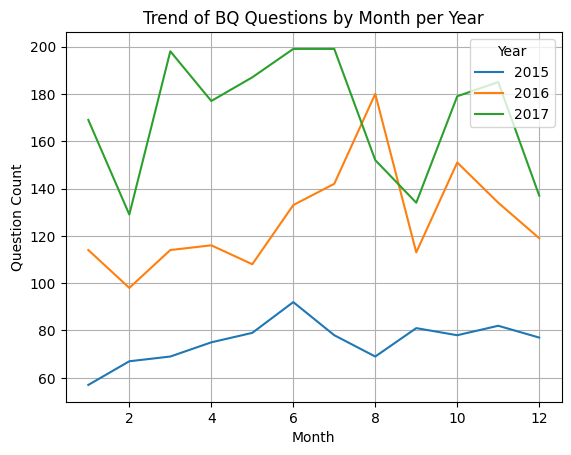

In [125]:
x = pivot_data_bq.index

y1 = pivot_data_bq[2015]
y2 = pivot_data_bq[2016]
y3 = pivot_data_bq[2017]

plt.plot(x, y1, label="2015")
plt.plot(x, y2, label="2016")
plt.plot(x, y3, label="2017")

plt.xlabel("Month")
plt.ylabel("Question Count")
plt.title("Trend of BQ Questions by Month per Year")

plt.legend(title="Year")

plt.grid(True)

plt.show()

In [126]:
grouped_data_studio = df_clean[df_clean["question_tag"]=="data-studio"].groupby(["year", "month"]).agg({"question_id":"count"}).reset_index()

grouped_data_studio.rename(columns={"question_id":"question_count"}, inplace=True)

pivot_data_studio = grouped_data_studio.pivot(index="month", columns="year", values="question_count")

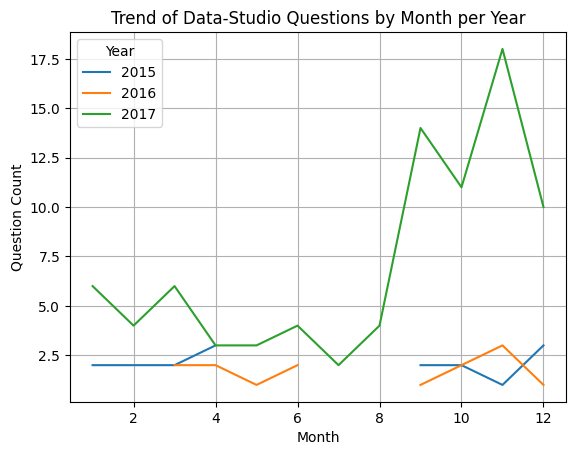

In [127]:
x = pivot_data_studio.index

y1 = pivot_data_studio[2015]
y2 = pivot_data_studio[2016]
y3 = pivot_data_studio[2017]

plt.plot(x, y1, label="2015")
plt.plot(x, y2, label="2016")
plt.plot(x, y3, label="2017")

plt.xlabel("Month")
plt.ylabel("Question Count")
plt.title("Trend of Data-Studio Questions by Month per Year")

plt.legend(title="Year")

plt.grid(True)

plt.show()

In [128]:
grouped_looker = df_clean[df_clean["question_tag"]=="looker"].groupby(["year", "month"]).agg({"question_id":"count"}).reset_index()

grouped_looker.rename(columns={"question_id":"question_count"}, inplace=True)

pivot_data_looker = grouped_looker.pivot(index="month", columns="year", values="question_count")

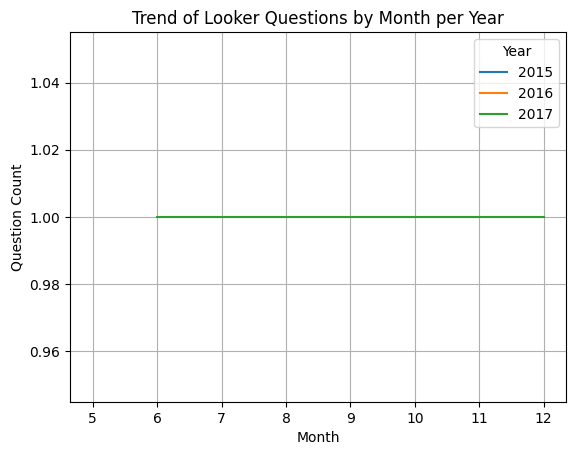

In [129]:
x = pivot_data_looker.index

y1 = pivot_data_looker[2015]
y2 = pivot_data_looker[2016]
y3 = pivot_data_looker[2017]

plt.plot(x, y1, label="2015")
plt.plot(x, y2, label="2016")
plt.plot(x, y3, label="2017")

plt.xlabel("Month")
plt.ylabel("Question Count")
plt.title("Trend of Looker Questions by Month per Year")

plt.legend(title="Year")

plt.grid(True)

plt.show()

# Answering Use Case 2
> ## Brand Ambassador Selection

In [130]:
df2 = pd.read_csv("/content/drive/MyDrive/DA - 13/GG3 finals python dataset stackoverflow.csv")
df2.head()

,question_id,question_owner_user_id,question_owner_location,question_title,question_body,question_created_date,question_score,question_tag,answer_id,answerer_user_id,answer_created_date,answer_score,answer_comment_count,is_accepted_answer
0,27733458,3769827.0,NaN,SQL script to get time to response in log table,<p>I have one scenario which I really have no ...,2015-01-01 18:31:22.693000 UTC,1,bq,27787398.0,1371484.0,2015-01-05 20:30:31.057000 UTC,1.0,1.0,False
1,27734669,2238969.0,NaN,Httparchive - BigQuery how to get median bytes...,<p>I am currently writing my bachelor theses a...,2015-01-01 21:04:30.070000 UTC,0,bq,27751284.0,3624307.0,2015-01-03 02:56:46.553000 UTC,1.0,2.0,False
2,27745803,4413122.0,"Austin, TX, United States",BigQuery GA multiple values,<p>I am trying to isolate users that have two ...,2015-01-02 17:09:50.047000 UTC,1,bq,27786830.0,1371484.0,2015-01-05 19:52:02.710000 UTC,1.0,1.0,False
3,27745803,4413122.0,"Austin, TX, United States",BigQuery GA multiple values,<p>I am trying to isolate users that have two ...,2015-01-02 17:09:50.047000 UTC,1,bq,27880982.0,428664.0,2015-01-10 20:38:15.840000 UTC,0.0,2.0,False
4,27748870,390973.0,NaN,BigQuery Cross Join Much Faster with Each,<p>I'm trying to look at user activity by date...,2015-01-02 21:38:00.870000 UTC,1,bq,27785857.0,3257867.0,2015-01-05 18:46:51.560000 UTC,6.0,0.0,True


In [131]:
df2.groupby(["question_tag", "is_accepted_answer"]).size()

question_tag  is_accepted_answer
bq            False                 3947
              True                  2653
data-studio   False                  133
              True                    53
looker        False                    8
              True                     1
dtype: int64

> ### Question Tag "bq"
---

In [132]:
top_10_answerer_bq=df2[(df2["is_accepted_answer"]==True) & (df2["question_tag"]=="bq")].groupby(["answerer_user_id", "question_tag", "is_accepted_answer"]).agg({"answer_id":"count"}).reset_index()

top_10_answerer_bq.rename(columns={"answer_id":"answer_count"}, inplace=True)

top_10_answerer_bq['rank']=top_10_answerer_bq["answer_count"].rank(method="first",ascending=False).astype(int)

top_10_answerer_bq.set_index("rank", inplace=True)

In [133]:
top_10_answerer_bq.sort_values(by="rank", ascending=True).head(10)

,answerer_user_id,question_tag,is_accepted_answer,answer_count
rank,,,,
1,5221944.0,bq,True,782
2,6253347.0,bq,True,203
3,243782.0,bq,True,169
4,4490873.0,bq,True,123
5,1002277.0,bq,True,114
6,132438.0,bq,True,113
7,2877278.0,bq,True,96
8,1375400.0,bq,True,57
9,4001094.0,bq,True,46


> ### Question Tag "data-studio"
---

In [134]:
top_10_answerer_data_studio=df2[(df2["is_accepted_answer"]==True) & (df2["question_tag"]=="data-studio")].groupby(["answerer_user_id", "question_tag", "is_accepted_answer"]).agg({"answer_id":"count"}).reset_index()

top_10_answerer_data_studio.rename(columns={"answer_id":"answer_count"}, inplace=True)

top_10_answerer_data_studio['rank']=top_10_answerer_data_studio["answer_count"].rank(method="first",ascending=False).astype(int)

top_10_answerer_data_studio.set_index("rank", inplace=True)

In [135]:
top_10_answerer_data_studio.sort_values(by="rank", ascending=True).head(10)

,answerer_user_id,question_tag,is_accepted_answer,answer_count
rank,,,,
1,4024072.0,data-studio,True,13
2,3832970.0,data-studio,True,6
3,5959625.0,data-studio,True,2
4,12892553.0,data-studio,True,2
5,27048.0,data-studio,True,1
6,154640.0,data-studio,True,1
7,154726.0,data-studio,True,1
8,456274.0,data-studio,True,1
9,568884.0,data-studio,True,1


> ### Question Tag "looker"
---

In [136]:
top_10_answerer_looker=df2[(df2["is_accepted_answer"]==True) & (df2["question_tag"]=="looker")].groupby(["answerer_user_id", "question_tag", "is_accepted_answer"]).agg({"answer_id":"count"}).reset_index()

top_10_answerer_looker.rename(columns={"answer_id":"answer_count"}, inplace=True)

top_10_answerer_looker['rank']=top_10_answerer_looker["answer_count"].rank(method="first",ascending=False).astype(int)

top_10_answerer_looker.set_index("rank", inplace=True)

In [137]:
top_10_answerer_looker.sort_values(by="rank", ascending=True).head(10)

,answerer_user_id,question_tag,is_accepted_answer,answer_count
rank,,,,
1,1904852.0,looker,True,1


# Answering Use Case 3
> ## User Activity Segmentation

In [138]:
df3 = pd.read_csv("/content/drive/MyDrive/DA - 13/GG3 finals python dataset stackoverflow.csv")
df3.head()

,question_id,question_owner_user_id,question_owner_location,question_title,question_body,question_created_date,question_score,question_tag,answer_id,answerer_user_id,answer_created_date,answer_score,answer_comment_count,is_accepted_answer
0,27733458,3769827.0,NaN,SQL script to get time to response in log table,<p>I have one scenario which I really have no ...,2015-01-01 18:31:22.693000 UTC,1,bq,27787398.0,1371484.0,2015-01-05 20:30:31.057000 UTC,1.0,1.0,False
1,27734669,2238969.0,NaN,Httparchive - BigQuery how to get median bytes...,<p>I am currently writing my bachelor theses a...,2015-01-01 21:04:30.070000 UTC,0,bq,27751284.0,3624307.0,2015-01-03 02:56:46.553000 UTC,1.0,2.0,False
2,27745803,4413122.0,"Austin, TX, United States",BigQuery GA multiple values,<p>I am trying to isolate users that have two ...,2015-01-02 17:09:50.047000 UTC,1,bq,27786830.0,1371484.0,2015-01-05 19:52:02.710000 UTC,1.0,1.0,False
3,27745803,4413122.0,"Austin, TX, United States",BigQuery GA multiple values,<p>I am trying to isolate users that have two ...,2015-01-02 17:09:50.047000 UTC,1,bq,27880982.0,428664.0,2015-01-10 20:38:15.840000 UTC,0.0,2.0,False
4,27748870,390973.0,NaN,BigQuery Cross Join Much Faster with Each,<p>I'm trying to look at user activity by date...,2015-01-02 21:38:00.870000 UTC,1,bq,27785857.0,3257867.0,2015-01-05 18:46:51.560000 UTC,6.0,0.0,True


In [139]:
# Extract the timestamp to get the year and month values
df3["question_created_date"] = pd.to_datetime(df3["question_created_date"])
df3["year_question"] = df3["question_created_date"].dt.year

df3["answer_created_date"] = pd.to_datetime(df3["answer_created_date"])
df3["year_answer"] = df3["answer_created_date"].dt.year
df3["year_answer"] = df3["year_answer"].fillna(0).astype(int)

df3.head()

,question_id,question_owner_user_id,question_owner_location,question_title,question_body,question_created_date,question_score,question_tag,answer_id,answerer_user_id,answer_created_date,answer_score,answer_comment_count,is_accepted_answer,year_question,year_answer
0,27733458,3769827.0,NaN,SQL script to get time to response in log table,<p>I have one scenario which I really have no ...,2015-01-01 18:31:22.693000+00:00,1,bq,27787398.0,1371484.0,2015-01-05 20:30:31.057000+00:00,1.0,1.0,False,2015,2015
1,27734669,2238969.0,NaN,Httparchive - BigQuery how to get median bytes...,<p>I am currently writing my bachelor theses a...,2015-01-01 21:04:30.070000+00:00,0,bq,27751284.0,3624307.0,2015-01-03 02:56:46.553000+00:00,1.0,2.0,False,2015,2015
2,27745803,4413122.0,"Austin, TX, United States",BigQuery GA multiple values,<p>I am trying to isolate users that have two ...,2015-01-02 17:09:50.047000+00:00,1,bq,27786830.0,1371484.0,2015-01-05 19:52:02.710000+00:00,1.0,1.0,False,2015,2015
3,27745803,4413122.0,"Austin, TX, United States",BigQuery GA multiple values,<p>I am trying to isolate users that have two ...,2015-01-02 17:09:50.047000+00:00,1,bq,27880982.0,428664.0,2015-01-10 20:38:15.840000+00:00,0.0,2.0,False,2015,2015
4,27748870,390973.0,NaN,BigQuery Cross Join Much Faster with Each,<p>I'm trying to look at user activity by date...,2015-01-02 21:38:00.870000+00:00,1,bq,27785857.0,3257867.0,2015-01-05 18:46:51.560000+00:00,6.0,0.0,True,2015,2015


In [140]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6795 entries, 0 to 6794
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   question_id              6795 non-null   int64              
 1   question_owner_user_id   6761 non-null   float64            
 2   question_owner_location  2770 non-null   object             
 3   question_title           6795 non-null   object             
 4   question_body            6795 non-null   object             
 5   question_created_date    6795 non-null   datetime64[ns, UTC]
 6   question_score           6795 non-null   int64              
 7   question_tag             6795 non-null   object             
 8   answer_id                6393 non-null   float64            
 9   answerer_user_id         6385 non-null   float64            
 10  answer_created_date      6393 non-null   datetime64[ns, UTC]
 11  answer_score             6393 

In [141]:
df3["year_answer"].isna().sum()

0

In [142]:
df3["year_question"].unique()

array([2015, 2016, 2017])

In [143]:
df3["year_answer"].unique()

array([2015, 2019, 2016, 2021, 2018, 2022,    0, 2020, 2017])

In [144]:
df3["year_question"].value_counts()

2017    3035
2016    2334
2015    1426
Name: year_question, dtype: int64

In [145]:
df3["year_answer"].value_counts()

2017    2526
2016    1964
2015    1107
0        402
2018     237
2019     200
2020     158
2021     136
2022      65
Name: year_answer, dtype: int64

In [146]:
df3.describe()

,question_id,question_owner_user_id,question_score,answer_id,answerer_user_id,answer_score,answer_comment_count,year_question,year_answer
count,6.795000e+03,6.761000e+03,6795.000000,6.393000e+03,6.385000e+03,6393.000000,6393.000000,6795.000000,6795.000000
mean,3.968053e+07,4.159195e+06,3.128477,4.221188e+07,3.987739e+06,2.697794,1.291412,2016.236792,1897.348492
std,5.535645e+06,2.513039e+06,6.916284,8.601282e+06,2.825050e+06,6.300766,2.075850,0.774939,475.818605
min,2.773346e+07,1.109000e+03,-6.000000,2.775128e+07,4.279000e+03,-8.000000,0.000000,2015.000000,0.000000
25%,3.541621e+07,1.934510e+06,0.000000,3.665496e+07,1.366527e+06,0.000000,0.000000,2016.000000,2016.000000
50%,4.037780e+07,4.193886e+06,1.000000,4.170803e+07,4.490873e+06,1.000000,0.000000,2016.000000,2016.000000
75%,4.437723e+07,6.156032e+06,3.000000,4.593654e+07,5.221944e+06,3.000000,2.000000,2017.000000,2017.000000
max,4.803929e+07,9.140111e+06,104.000000,7.375586e+07,1.954279e+07,156.000000,21.000000,2017.000000,2022.000000


In [147]:
df3.duplicated(subset="answer_id").sum()

401

In [148]:
df3[df3.duplicated(subset="answer_id")]

,question_id,question_owner_user_id,question_owner_location,question_title,question_body,question_created_date,question_score,question_tag,answer_id,answerer_user_id,answer_created_date,answer_score,answer_comment_count,is_accepted_answer,year_question,year_answer
57,28124932,1612584.0,London,Is it possible to create an OData service on G...,<p>I have been trying to find a way to expose ...,2015-01-24 11:18:55.913000+00:00,0,bq,NaN,NaN,NaT,NaN,NaN,False,2015,0
122,28420610,4548179.0,NaN,Increasing _MAX_ROWS_PER_REQUEST in google-big...,<p>I have been using the google-bigquery pytho...,2015-02-09 22:24:36.587000+00:00,1,bq,NaN,NaN,NaT,NaN,NaN,False,2015,0
126,28425867,473208.0,Israel,Randomly errors for insert and select data,<p>In the last couple of weeks we are getting ...,2015-02-10 07:01:22.540000+00:00,0,bq,NaN,NaN,NaT,NaN,NaN,False,2015,0
169,28601775,3294904.0,NaN,Bigquery CLI windows issue,<p>When I run a query for a table around 20Mil...,2015-02-19 08:40:07.107000+00:00,0,bq,NaN,NaN,NaT,NaN,NaN,False,2015,0
288,29301463,2031855.0,NaN,Bigquery SSL error while doing streaming inser...,<p>We are using bigquery streaming api to inse...,2015-03-27 13:08:35.487000+00:00,2,bq,NaN,NaN,NaT,NaN,NaN,False,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6742,47890621,7230815.0,NaN,Simba ODBC Driver for Excel Failing to Retriev...,<p>I have total of 4 PCs which I am trying to ...,2017-12-19 15:52:05.613000+00:00,0,bq,NaN,NaN,NaT,NaN,NaN,False,2017,0
6754,47911221,1431672.0,"Sacramento, CA, United States",Does BigQuery charge for querying only the str...,<p>I have a day partitioned table with approx ...,2017-12-20 17:15:59.653000+00:00,3,bq,NaN,NaN,NaT,NaN,NaN,False,2017,0
6755,47914244,9124508.0,NaN,Google Big Query Connection to Alteryx Using t...,<p>I am having trouble connecting to my Google...,2017-12-20 20:56:54.200000+00:00,1,bq,NaN,NaN,NaT,NaN,NaN,False,2017,0
6759,47921232,6228435.0,日本 Tōkyō,Embulk: Cannot insert data from MySQL to BigQuery,<p>I'm trying to put data from mysql to bigque...,2017-12-21 08:50:25.783000+00:00,0,bq,NaN,NaN,NaT,NaN,NaN,False,2017,0


In [149]:
df3.duplicated(subset="question_owner_user_id").sum()

4457

In [150]:
df3[df3["question_owner_user_id"]==5221944.0]

,question_id,question_owner_user_id,question_owner_location,question_title,question_body,question_created_date,question_score,question_tag,answer_id,answerer_user_id,answer_created_date,answer_score,answer_comment_count,is_accepted_answer,year_question,year_answer
972,32660226,5221944.0,"Los Angeles, CA",Billing Tier is out of expected range,<p>While observing the totalBytesBilled and bi...,2015-09-18 20:08:16.437000+00:00,3,bq,32661143.0,1375400.0,2015-09-18 21:16:17.687000+00:00,4.0,0.0,True,2015,2015
1039,32914523,5221944.0,"Los Angeles, CA",Luxury Numbers Table in BigQuery,<p>Numbers tables are truly invaluable and use...,2015-10-02 19:31:58.027000+00:00,-1,bq,32914556.0,5221944.0,2015-10-02 19:33:41.273000+00:00,2.0,0.0,True,2015,2015
1176,33524902,5221944.0,"Los Angeles, CA","""New version of BigQuery"" Message",<p>Last few days I am getting below message in...,2015-11-04 14:52:44.510000+00:00,1,bq,33529139.0,1375400.0,2015-11-04 18:15:55.983000+00:00,1.0,2.0,True,2015,2015
1533,34845697,5221944.0,"Los Angeles, CA",How to scale Pivoting in BigQuery?,"<p>Let's say, I have music video play stats ta...",2016-01-18 00:50:45.200000+00:00,6,bq,34845698.0,5221944.0,2016-01-18 00:50:45.200000+00:00,8.0,0.0,True,2016,2016
1610,35109451,5221944.0,"Los Angeles, CA",How to access “Saved Queries” programmatically?,"<p>In BigQuery Web UI, there is a “Saved Queri...",2016-01-31 01:51:33.583000+00:00,24,bq,35111413.0,1375400.0,2016-01-31 07:30:11.170000+00:00,27.0,10.0,True,2016,2016
1889,36210632,5221944.0,"Los Angeles, CA",How to best leverage Capacitor introduction be...,"<p>Below quote is from <a href=""https://cloud....",2016-03-24 21:52:16.033000+00:00,3,bq,36211726.0,4490873.0,2016-03-24 23:31:50.723000+00:00,2.0,3.0,True,2016,2016
2072,36781049,5221944.0,"Los Angeles, CA",Different Aliases produce different Result for...,<p>Below two versions of the same exactly quer...,2016-04-21 21:46:04.757000+00:00,1,bq,36807430.0,1375400.0,2016-04-23 06:22:23.513000+00:00,2.0,5.0,False,2016,2016
2073,36781520,5221944.0,"Los Angeles, CA","Same exactly Query Fails or ""Succeeds"" with di...",<p>Below two versions of the same exactly quer...,2016-04-21 22:27:09.550000+00:00,2,bq,36789153.0,5214931.0,2016-04-22 08:47:48.873000+00:00,0.0,2.0,True,2016,2016
2074,36781520,5221944.0,"Los Angeles, CA","Same exactly Query Fails or ""Succeeds"" with di...",<p>Below two versions of the same exactly quer...,2016-04-21 22:27:09.550000+00:00,2,bq,36899069.0,4490873.0,2016-04-27 19:22:06.047000+00:00,1.0,2.0,False,2016,2016
2781,38884708,5221944.0,"Los Angeles, CA",How to generate series in BigQuery Standard SQL,<p>I need to generate table with <em>say</em> ...,2016-08-10 22:40:33.533000+00:00,20,bq,39082506.0,6253347.0,2016-08-22 14:45:04.730000+00:00,34.0,2.0,False,2016,2016


> ### Threshold Question 2015
---

In [151]:
threshold_questions=df3.groupby(["question_owner_user_id", "year_question"]).agg({"question_id":"nunique"}).reset_index()

threshold_questions.rename(columns={"question_id":"question_cnt"}, inplace=True)

threshold_questions.sort_values(by="question_cnt", ascending=False).head()

,question_owner_user_id,year_question,question_cnt
1024,3418376.0,2017,40
1029,3447653.0,2016,29
1910,6373988.0,2016,21
909,2877278.0,2015,21
2366,8192249.0,2017,20


In [152]:
threshold_questions_2015=threshold_questions[threshold_questions["year_question"] == 2015].groupby(["question_owner_user_id", "year_question"]).agg({"question_cnt":"mean"}).reset_index()

threshold_questions_2015.rename(columns={"question_cnt":"avg_question"}, inplace=True)

threshold_questions_2015.sort_values(by="avg_question", ascending=False).head()

,question_owner_user_id,year_question,avg_question
219,2877278.0,2015,21.0
250,3469521.0,2015,14.0
406,4961403.0,2015,14.0
91,1049893.0,2015,13.0
302,4213553.0,2015,12.0


In [153]:
threshold_questions_2015["avg_question"].agg("mean")

1.8290258449304175

In [154]:
# The threshold is determined based on the average number of questions
threshold_questions_2015.loc[threshold_questions_2015["avg_question"] <= 1.8290258449304175,"threshold_question"] = "low"

threshold_questions_2015.loc[threshold_questions_2015["avg_question"] > 1.8290258449304175,"threshold_question"] = "hi"

In [155]:
threshold_questions_2015["threshold_question"].value_counts()

low    346
hi     157
Name: threshold_question, dtype: int64

In [156]:
threshold_questions_2015["user_id"]=threshold_questions_2015[["question_owner_user_id"]].copy()

threshold_questions_2015.sort_values(by="avg_question", ascending=False)

,question_owner_user_id,year_question,avg_question,threshold_question,user_id
219,2877278.0,2015,21.0,hi,2877278.0
250,3469521.0,2015,14.0,hi,3469521.0
406,4961403.0,2015,14.0,hi,4961403.0
91,1049893.0,2015,13.0,hi,1049893.0
302,4213553.0,2015,12.0,hi,4213553.0
...,...,...,...,...,...
194,2533394.0,2015,1.0,low,2533394.0
193,2478711.0,2015,1.0,low,2478711.0
191,2472753.0,2015,1.0,low,2472753.0
190,2469486.0,2015,1.0,low,2469486.0


> ### Threshold Answer 2015
---

In [157]:
threshold_answers=df3.groupby(["answerer_user_id", "year_answer"]).agg({"answer_id":"count"}).reset_index()

threshold_answers.rename(columns={"answer_id":"answer_cnt"}, inplace=True)

threshold_answers.sort_values(by="answer_cnt", ascending=False).head()

,answerer_user_id,year_answer,answer_cnt
1327,5221944.0,2016,625
1328,5221944.0,2017,565
1511,6253347.0,2017,302
334,1002277.0,2017,185
116,243782.0,2015,158


In [158]:
threshold_answers_2015=threshold_answers[threshold_answers["year_answer"] == 2015].groupby(["answerer_user_id", "year_answer"]).agg({"answer_cnt":"mean"}).reset_index()

threshold_answers_2015.rename(columns={"answer_cnt":"avg_answer"}, inplace=True)

threshold_answers_2015.sort_values(by="avg_answer", ascending=False).head()

,answerer_user_id,year_answer,avg_answer
27,243782.0,2015,158.0
218,4490873.0,2015,115.0
255,5221944.0,2015,91.0
15,132438.0,2015,90.0
83,1366527.0,2015,65.0


In [159]:
threshold_answers_2015["avg_answer"].agg("mean")

4.0218181818181815

In [160]:
# The threshold is determined based on the average number of questions
threshold_answers_2015.loc[threshold_answers_2015["avg_answer"] <= 4.0218,"threshold_answer"] = "low"

threshold_answers_2015.loc[threshold_answers_2015["avg_answer"] > 4.0218,"threshold_answer"] = "hi"

In [161]:
threshold_answers_2015["threshold_answer"].value_counts()

low    252
hi      23
Name: threshold_answer, dtype: int64

In [162]:
threshold_answers_2015["user_id"]=threshold_answers_2015[["answerer_user_id"]].copy()

threshold_answers_2015.sort_values(by="avg_answer", ascending=False)

,answerer_user_id,year_answer,avg_answer,threshold_answer,user_id
27,243782.0,2015,158.0,hi,243782.0
218,4490873.0,2015,115.0,hi,4490873.0
255,5221944.0,2015,91.0,hi,5221944.0
15,132438.0,2015,90.0,hi,132438.0
83,1366527.0,2015,65.0,hi,1366527.0
...,...,...,...,...,...
111,1964388.0,2015,1.0,low,1964388.0
112,1974047.0,2015,1.0,low,1974047.0
113,1983809.0,2015,1.0,low,1983809.0
115,2117421.0,2015,1.0,low,2117421.0


> ### Merge Question 2015 & Answer 2015
---

In [163]:
segmentation_2015=threshold_questions_2015.merge(threshold_answers_2015, how="inner", on="user_id")

segmentation_2015.head()

,question_owner_user_id,year_question,avg_question,threshold_question,user_id,answerer_user_id,year_answer,avg_answer,threshold_answer
0,79669.0,2015,1.0,low,79669.0,79669.0,2015,1.0,low
1,111934.0,2015,2.0,hi,111934.0,111934.0,2015,1.0,low
2,132438.0,2015,8.0,hi,132438.0,132438.0,2015,90.0,hi
3,222467.0,2015,1.0,low,222467.0,222467.0,2015,1.0,low
4,243782.0,2015,5.0,hi,243782.0,243782.0,2015,158.0,hi


In [164]:
segmentation_2015.loc[(segmentation_2015["threshold_question"] == "hi") & (segmentation_2015["threshold_answer"] == "hi"),"persona_name"] = "Inquisitive Guru"
segmentation_2015.loc[(segmentation_2015["threshold_question"] == "hi") & (segmentation_2015["threshold_answer"] == "low"),"persona_name"] = "Curious Observer"
segmentation_2015.loc[(segmentation_2015["threshold_question"] == "low") & (segmentation_2015["threshold_answer"] == "hi"),"persona_name"] = "Knowledgeable Supporter"
segmentation_2015.loc[(segmentation_2015["threshold_question"] == "low") & (segmentation_2015["threshold_answer"] == "low"),"persona_name"] = "Silent Spectator"

In [165]:
segmentation_2015.head()

,question_owner_user_id,year_question,avg_question,threshold_question,user_id,answerer_user_id,year_answer,avg_answer,threshold_answer,persona_name
0,79669.0,2015,1.0,low,79669.0,79669.0,2015,1.0,low,Silent Spectator
1,111934.0,2015,2.0,hi,111934.0,111934.0,2015,1.0,low,Curious Observer
2,132438.0,2015,8.0,hi,132438.0,132438.0,2015,90.0,hi,Inquisitive Guru
3,222467.0,2015,1.0,low,222467.0,222467.0,2015,1.0,low,Silent Spectator
4,243782.0,2015,5.0,hi,243782.0,243782.0,2015,158.0,hi,Inquisitive Guru


> ### Threshold Question 2016
---

In [166]:
threshold_questions_2016=threshold_questions[threshold_questions["year_question"] == 2016].groupby(["question_owner_user_id", "year_question"]).agg({"question_cnt":"mean"}).reset_index()

threshold_questions_2016.rename(columns={"question_cnt":"avg_question"}, inplace=True)

threshold_questions_2016.sort_values(by="avg_question", ascending=False).head()

,question_owner_user_id,year_question,avg_question
354,3447653.0,2016,29.0
674,6373988.0,2016,21.0
706,6533039.0,2016,16.0
613,5987148.0,2016,15.0
612,5980143.0,2016,13.0


In [167]:
threshold_questions_2016["avg_question"].agg("mean")

1.8347305389221558

In [168]:
# The threshold is determined based on the average number of questions
threshold_questions_2016.loc[threshold_questions_2016["avg_question"] <= 1.8347305389221558,"threshold_question"] = "low"

threshold_questions_2016.loc[threshold_questions_2016["avg_question"] > 1.8347305389221558,"threshold_question"] = "hi"

In [169]:
threshold_questions_2016["threshold_question"].value_counts()

low    566
hi     269
Name: threshold_question, dtype: int64

In [170]:
threshold_questions_2016["user_id"]=threshold_questions_2016[["question_owner_user_id"]].copy()

threshold_questions_2016.sort_values(by="avg_question", ascending=False)

,question_owner_user_id,year_question,avg_question,threshold_question,user_id
354,3447653.0,2016,29.0,hi,3447653.0
674,6373988.0,2016,21.0,hi,6373988.0
706,6533039.0,2016,16.0,hi,6533039.0
613,5987148.0,2016,15.0,hi,5987148.0
612,5980143.0,2016,13.0,hi,5980143.0
...,...,...,...,...,...
440,4412274.0,2016,1.0,low,4412274.0
441,4412296.0,2016,1.0,low,4412296.0
442,4415391.0,2016,1.0,low,4415391.0
443,4417394.0,2016,1.0,low,4417394.0


> ### Threshold Answer 2016
---

In [171]:
threshold_answers_2016=threshold_answers[threshold_answers["year_answer"] == 2016].groupby(["answerer_user_id", "year_answer"]).agg({"answer_cnt":"mean"}).reset_index()

threshold_answers_2016.rename(columns={"answer_cnt":"avg_answer"}, inplace=True)

threshold_answers_2016.sort_values(by="avg_answer", ascending=False).head()

,answerer_user_id,year_answer,avg_answer
342,5221944.0,2016,625.0
405,6253347.0,2016,101.0
20,132438.0,2016,83.0
30,243782.0,2016,75.0
302,4490873.0,2016,54.0


In [172]:
threshold_answers_2016["avg_answer"].agg("mean")

4.224137931034483

In [173]:
# The threshold is determined based on the average number of questions
threshold_answers_2016.loc[threshold_answers_2016["avg_answer"] <= 4.224137931034483,"threshold_answer"] = "low"

threshold_answers_2016.loc[threshold_answers_2016["avg_answer"] > 4.224137931034483,"threshold_answer"] = "hi"

In [174]:
threshold_answers_2016["threshold_answer"].value_counts()

low    425
hi      39
Name: threshold_answer, dtype: int64

In [175]:
threshold_answers_2016["user_id"]=threshold_answers_2016[["answerer_user_id"]].copy()

threshold_answers_2016.sort_values(by="avg_answer", ascending=False)

,answerer_user_id,year_answer,avg_answer,threshold_answer,user_id
342,5221944.0,2016,625.0,hi,5221944.0
405,6253347.0,2016,101.0,hi,6253347.0
20,132438.0,2016,83.0,hi,132438.0
30,243782.0,2016,75.0,hi,243782.0
302,4490873.0,2016,54.0,hi,4490873.0
...,...,...,...,...,...
171,2067753.0,2016,1.0,low,2067753.0
170,2056488.0,2016,1.0,low,2056488.0
169,1919374.0,2016,1.0,low,1919374.0
168,1915327.0,2016,1.0,low,1915327.0


> ### Merge Question 2016 & Answer 2016
---

In [176]:
segmentation_2016=threshold_questions_2016.merge(threshold_answers_2016, how="inner", on="user_id")

segmentation_2016.head()

,question_owner_user_id,year_question,avg_question,threshold_question,user_id,answerer_user_id,year_answer,avg_answer,threshold_answer
0,18445.0,2016,1.0,low,18445.0,18445.0,2016,2.0,low
1,35338.0,2016,4.0,hi,35338.0,35338.0,2016,1.0,low
2,39242.0,2016,1.0,low,39242.0,39242.0,2016,1.0,low
3,44385.0,2016,1.0,low,44385.0,44385.0,2016,1.0,low
4,46255.0,2016,1.0,low,46255.0,46255.0,2016,1.0,low


In [177]:
segmentation_2016.loc[(segmentation_2016["threshold_question"] == "hi") & (segmentation_2016["threshold_answer"] == "hi"),"persona_name"] = "Inquisitive Guru"
segmentation_2016.loc[(segmentation_2016["threshold_question"] == "hi") & (segmentation_2016["threshold_answer"] == "low"),"persona_name"] = "Curious Observer"
segmentation_2016.loc[(segmentation_2016["threshold_question"] == "low") & (segmentation_2016["threshold_answer"] == "hi"),"persona_name"] = "Knowledgeable Supporter"
segmentation_2016.loc[(segmentation_2016["threshold_question"] == "low") & (segmentation_2016["threshold_answer"] == "low"),"persona_name"] = "Silent Spectator"

In [178]:
segmentation_2016.head()

,question_owner_user_id,year_question,avg_question,threshold_question,user_id,answerer_user_id,year_answer,avg_answer,threshold_answer,persona_name
0,18445.0,2016,1.0,low,18445.0,18445.0,2016,2.0,low,Silent Spectator
1,35338.0,2016,4.0,hi,35338.0,35338.0,2016,1.0,low,Curious Observer
2,39242.0,2016,1.0,low,39242.0,39242.0,2016,1.0,low,Silent Spectator
3,44385.0,2016,1.0,low,44385.0,44385.0,2016,1.0,low,Silent Spectator
4,46255.0,2016,1.0,low,46255.0,46255.0,2016,1.0,low,Silent Spectator


> ### Threshold Question 2017
---

In [179]:
threshold_questions_2017=threshold_questions[threshold_questions["year_question"] == 2017].groupby(["question_owner_user_id", "year_question"]).agg({"question_cnt":"mean"}).reset_index()

threshold_questions_2017.rename(columns={"question_cnt":"avg_question"}, inplace=True)

threshold_questions_2017.sort_values(by="avg_question", ascending=False).head()

,question_owner_user_id,year_question,avg_question
423,3418376.0,2017,40.0
1028,8192249.0,2017,20.0
95,651174.0,2017,19.0
574,5066083.0,2017,17.0
754,6475558.0,2017,17.0


In [180]:
threshold_questions_2017["avg_question"].agg("mean")

1.7518549051937344

In [181]:
# The threshold is determined based on the average number of questions
threshold_questions_2017.loc[threshold_questions_2017["avg_question"] <= 1.7518549051937344,"threshold_question"] = "low"

threshold_questions_2017.loc[threshold_questions_2017["avg_question"] > 1.7518549051937344,"threshold_question"] = "hi"

In [182]:
threshold_questions_2017["threshold_question"].value_counts()

low    876
hi     337
Name: threshold_question, dtype: int64

In [183]:
threshold_questions_2017["user_id"]=threshold_questions_2017[["question_owner_user_id"]].copy()

threshold_questions_2017.sort_values(by="avg_question", ascending=False)

,question_owner_user_id,year_question,avg_question,threshold_question,user_id
423,3418376.0,2017,40.0,hi,3418376.0
1028,8192249.0,2017,20.0,hi,8192249.0
95,651174.0,2017,19.0,hi,651174.0
574,5066083.0,2017,17.0,hi,5066083.0
754,6475558.0,2017,17.0,hi,6475558.0
...,...,...,...,...,...
479,3887215.0,2017,1.0,low,3887215.0
481,3893741.0,2017,1.0,low,3893741.0
482,3898958.0,2017,1.0,low,3898958.0
483,3912176.0,2017,1.0,low,3912176.0


> ### Threshold Answer 2017
---

In [184]:
threshold_answers_2017=threshold_answers[threshold_answers["year_answer"] == 2017].groupby(["answerer_user_id", "year_answer"]).agg({"answer_cnt":"mean"}).reset_index()

threshold_answers_2017.rename(columns={"answer_cnt":"avg_answer"}, inplace=True)

threshold_answers_2017.sort_values(by="avg_answer", ascending=False).head()

,answerer_user_id,year_answer,avg_answer
398,5221944.0,2017,565.0
452,6253347.0,2017,302.0
97,1002277.0,2017,185.0
242,2877278.0,2017,115.0
23,132438.0,2017,83.0


In [185]:
threshold_answers_2017["avg_answer"].agg("mean")

3.874233128834356

In [186]:
# The threshold is determined based on the average number of questions
threshold_answers_2017.loc[threshold_answers_2017["avg_answer"] <= 3.874233128834356,"threshold_answer"] = "low"

threshold_answers_2017.loc[threshold_answers_2017["avg_answer"] > 3.874233128834356,"threshold_answer"] = "hi"

In [187]:
threshold_answers_2017["threshold_answer"].value_counts()

low    602
hi      50
Name: threshold_answer, dtype: int64

In [188]:
threshold_answers_2017["user_id"]=threshold_answers_2017[["answerer_user_id"]].copy()

threshold_answers_2017.sort_values(by="avg_answer", ascending=False)

,answerer_user_id,year_answer,avg_answer,threshold_answer,user_id
398,5221944.0,2017,565.0,hi,5221944.0
452,6253347.0,2017,302.0,hi,6253347.0
97,1002277.0,2017,185.0,hi,1002277.0
242,2877278.0,2017,115.0,hi,2877278.0
23,132438.0,2017,83.0,hi,132438.0
...,...,...,...,...,...
239,2797185.0,2017,1.0,low,2797185.0
240,2809691.0,2017,1.0,low,2809691.0
241,2836591.0,2017,1.0,low,2836591.0
244,2915210.0,2017,1.0,low,2915210.0


> ### Merge Question 2017 & Answer 2017
---

In [189]:
segmentation_2017=threshold_questions_2017.merge(threshold_answers_2017, how="inner", on="user_id")

segmentation_2017.head()

,question_owner_user_id,year_question,avg_question,threshold_question,user_id,answerer_user_id,year_answer,avg_answer,threshold_answer
0,10728.0,2017,1.0,low,10728.0,10728.0,2017,1.0,low
1,36191.0,2017,4.0,hi,36191.0,36191.0,2017,1.0,low
2,46255.0,2017,2.0,hi,46255.0,46255.0,2017,2.0,low
3,113230.0,2017,1.0,low,113230.0,113230.0,2017,1.0,low
4,132438.0,2017,7.0,hi,132438.0,132438.0,2017,83.0,hi


In [190]:
segmentation_2017.loc[(segmentation_2017["threshold_question"] == "hi") & (segmentation_2017["threshold_answer"] == "hi"),"persona_name"] = "Inquisitive Guru"
segmentation_2017.loc[(segmentation_2017["threshold_question"] == "hi") & (segmentation_2017["threshold_answer"] == "low"),"persona_name"] = "Curious Observer"
segmentation_2017.loc[(segmentation_2017["threshold_question"] == "low") & (segmentation_2017["threshold_answer"] == "hi"),"persona_name"] = "Knowledgeable Supporter"
segmentation_2017.loc[(segmentation_2017["threshold_question"] == "low") & (segmentation_2017["threshold_answer"] == "low"),"persona_name"] = "Silent Spectator"

In [191]:
segmentation_2017.head()

,question_owner_user_id,year_question,avg_question,threshold_question,user_id,answerer_user_id,year_answer,avg_answer,threshold_answer,persona_name
0,10728.0,2017,1.0,low,10728.0,10728.0,2017,1.0,low,Silent Spectator
1,36191.0,2017,4.0,hi,36191.0,36191.0,2017,1.0,low,Curious Observer
2,46255.0,2017,2.0,hi,46255.0,46255.0,2017,2.0,low,Curious Observer
3,113230.0,2017,1.0,low,113230.0,113230.0,2017,1.0,low,Silent Spectator
4,132438.0,2017,7.0,hi,132438.0,132438.0,2017,83.0,hi,Inquisitive Guru


In [192]:
segmentation_2017.duplicated(subset="user_id").sum()

0

In [193]:
segmentation_2017[segmentation_2017.duplicated(subset="user_id")]

,question_owner_user_id,year_question,avg_question,threshold_question,user_id,answerer_user_id,year_answer,avg_answer,threshold_answer,persona_name


> ### Combine 3 Data Frames
---

In [194]:
segmentation_combine = pd.concat([segmentation_2015, segmentation_2016, segmentation_2017])

In [195]:
segmentation_combine.head()

,question_owner_user_id,year_question,avg_question,threshold_question,user_id,answerer_user_id,year_answer,avg_answer,threshold_answer,persona_name
0,79669.0,2015,1.0,low,79669.0,79669.0,2015,1.0,low,Silent Spectator
1,111934.0,2015,2.0,hi,111934.0,111934.0,2015,1.0,low,Curious Observer
2,132438.0,2015,8.0,hi,132438.0,132438.0,2015,90.0,hi,Inquisitive Guru
3,222467.0,2015,1.0,low,222467.0,222467.0,2015,1.0,low,Silent Spectator
4,243782.0,2015,5.0,hi,243782.0,243782.0,2015,158.0,hi,Inquisitive Guru


In [196]:
# Group data by year and segment, then count the number of users in each group
segmentation_pivot = segmentation_combine.pivot_table(index="year_question", columns="persona_name", values="user_id", aggfunc="count")

In [197]:
segmentation_pivot

persona_name,Curious Observer,Inquisitive Guru,Knowledgeable Supporter,Silent Spectator
year_question,,,,
2015,44,9,3,36
2016,63,13,3,72
2017,96,14,3,102


> ### Data visualization
---

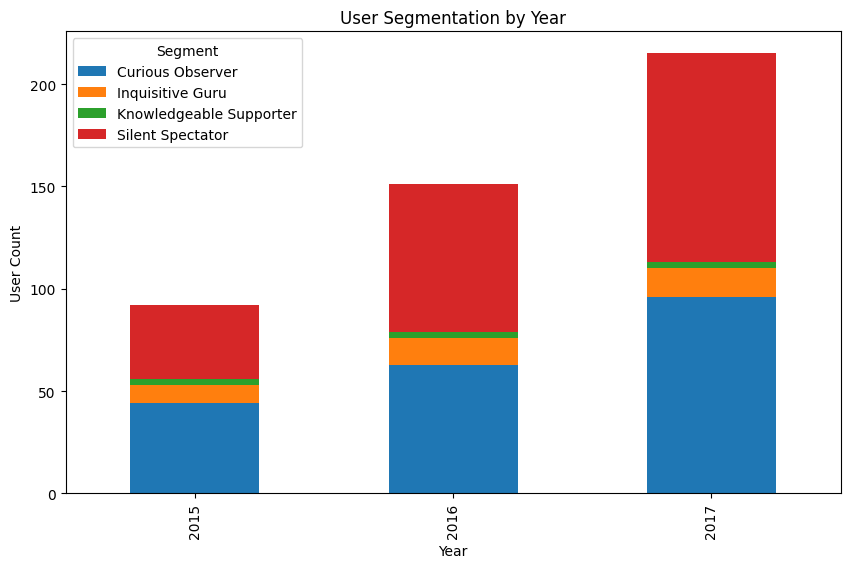

In [198]:
# Create a stacked bar chart
ax = segmentation_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('User Segmentation by Year')
plt.xlabel('Year')
plt.ylabel('User Count')
plt.legend(title='Segment')
plt.show()